1. trees.csv를 읽어들여서 아래에 대해  
  1) 상관관계, 다중공선성을 확인하시요  
  2) crossvalidation score 를 구하시요.  
  3) 아래의 데이터를 이용하여 Volume을 예측하시요  
  Girth 8.8, 10.5  
  Height 63, 72  

2. volume이 40 이상이면 크다  
  30이상이면 보통 미만이면 적음으로  
  아래와 같이 출력하시요  
  
  volume  정도   
  10.3    적음  
  ...

3. Height  가 가장 작은값과 큰값을
구하시요

4. girth(테두리) 가 가장큰 top5를
구하시요(girth, height, volume)


# 기본 모듈

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=12.8,10.8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1. trees.csv를 읽어들여서 아래에 대해

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/data/trees.csv'

In [ ]:
#tree = pd.read_csv('data/trees.csv')

In [ ]:
df_tree=pd.read_csv(filename) #이름변경필요
df_tree.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


### Q1-1) 상관관계, 다중공선성을 확인하시요

In [ ]:
df_tree.corr()

,Girth,Height,Volume
Girth,1.000000,0.51928,0.967119
Height,0.519280,1.00000,0.598250
Volume,0.967119,0.59825,1.000000


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


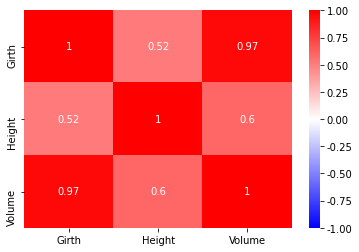

In [ ]:
sb.heatmap(df_tree.corr(),annot=True,cmap='bwr',vmin=-1,vmax=1) #빨간색일수록 양의  상관관계 파란색은 음의 상관관계 흰색은 상관관계 없음
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(df_tree.values, i )  for i in range( df_tree.shape[1] ) ]
vif['features'] = df_tree.columns
vif


,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


## Q1-2) crossvalidation score 를 구하시요.

In [ ]:
x_data=df_tree[['Girth','Height']]
y_data=df_tree['Volume']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=1)

model=make_pipeline(StandardScaler(),SGDRegressor() )
model.fit(x_train, y_train)

model.score(x_train, y_train)

model.score(x_test, y_test)


r2scores=cross_val_score(model, xmodel.predict([[8.8, 63], [10.5, 72]])_data, y_data,cv=5,scoring='r2',verbose=1) #cv 몇개로 나눌거임? 디폴트는 5개 scorint-> 뭘측정할거임?
print(r2scores)
print(r2scores.mean())

[-2.51326001  0.66520817 -0.16251107  0.53321226 -0.67695469]
-0.4308610667790894


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Q1-3) 아래의 데이터를 이용하여 Volume을 예측하시요 Girth 8.8, 10.5 Height 63, 72

In [ ]:
model.predict([[8.8, 63], [10.5, 72]])

array([ 5.59307109, 16.27976155])

### Q2) volume이 40 이상이면 크다, 30이상이면 보통 미만이면 적음으로 출력하시오

In [30]:
df_tree['정도']=0

In [31]:
for i in range(len(df_tree)) :
    if df_tree['Volume'][i] >= 40 :
        df_tree['정도'][i] = '크다'
    elif df_tree['Volume'][i] >= 30 :
        df_tree['정도'][i] = '보통'
    else :
        df_tree['정도'][i] = '적음'

df_tree


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykerne

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


### Q4)Height가 가장 작은값고 큰값을 구하시오

In [32]:
print(df_tree['Height'].min())
print(df_tree['Height'].max())

63
87


### Q5) girth가 가장큰 top5를 구하시오

In [33]:
df_tree.sort_values('Girth', ascending=False).head()

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다
